In [11]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# from pretty_confusion_matrix import pp_matrix

In [12]:
def plot_confusion_matrix(name, cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, fold=0):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.0f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe verdadeira')
    plt.xlabel('Classe prevista')

    plt.savefig(name)

    plt.close()

In [13]:
X = []
y = []

classes = ["beach","bus","cafe_restaurant","car","city_center","forest_path","grocery_store","home","library","metro_station","office","park","residential_area","train","tram"]

arq = open("./features_LBP_janela.txt", "r")
for linha in arq:
    aux = linha.split("|")
    lbp_local = []
    for i in range(len(aux)-1):
        classe_local = []
        aux2 = aux[i].split(";")
        for j in aux2:
            classe_local.append(float(j))
        lbp_local.append(classe_local)
    X.append(lbp_local)
    y.append(aux[len(aux)-1].replace("\n", ""))
arq.close()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

X_train2 = []
y_train2 = []

for i, train in enumerate(X_train):
    for j in train:
        X_train2.append(j)
        y_train2.append(y_train[i])
    
X_test2 = []
y_test2 = []

for i, train in enumerate(X_test):
    for j in train:
        X_test2.append(j)
        y_test2.append(y_test[i])

In [15]:
y_preds = []
svm_preds = []
best_model_svm, best_acc_svm = None, 0.0

k_fold = 5
# Split dos folds
kfold = KFold(n_splits=k_fold, shuffle=True)

# For para treinamento entre os folds
fold_no = 1
for train, test in kfold.split(X, y):
    print('------------------------------------------------------------------------')
    print(f'Treinamento para o fold {fold_no} ...')

    # Vetores para teste e treinamento
    x_train_svm = []
    y_train_svm = []

    x_test_svm = []
    y_test_svm = []

    # Fazendo o split dos dados para treinamento
    for i in train:
        for j in range(6):
            x_train_svm.append(X[i][j])
            y_train_svm.append(y[i])

    # Fazendo o split dos dados para teste
    for i in test:
        for j in range(6):
            x_test_svm.append(X[i][j])
            y_test_svm.append(y[i])


    y_pred = y_test_svm[:]
    for res in y_pred:
        y_preds.append(res)

    # SVM
    svm_model = SVC(C=100, kernel='poly', gamma='scale', probability=True)
    svm_model.fit(x_train_svm, y_train_svm)
    svm_predictions = svm_model.predict_proba(x_test_svm)

    svm_predictions = svm_model.predict(x_test_svm)
    acc_svm = accuracy_score(y_test_svm, svm_predictions)

    for i in svm_predictions:
        svm_preds.append(i)

    print(f'{acc_svm} para o fold {fold_no}')

    if acc_svm > best_acc_svm:
        best_acc_svm = acc_svm
        best_model_svm = svm_model

    fold_no += 1

------------------------------------------------------------------------
Treinamento para o fold 1 ...
0.6688034188034188 para o fold 1
------------------------------------------------------------------------
Treinamento para o fold 2 ...
0.6396011396011396 para o fold 2
------------------------------------------------------------------------
Treinamento para o fold 3 ...
0.6474358974358975 para o fold 3
------------------------------------------------------------------------
Treinamento para o fold 4 ...
0.6381766381766382 para o fold 4
------------------------------------------------------------------------
Treinamento para o fold 5 ...
0.6089743589743589 para o fold 5


0.6405982905982905


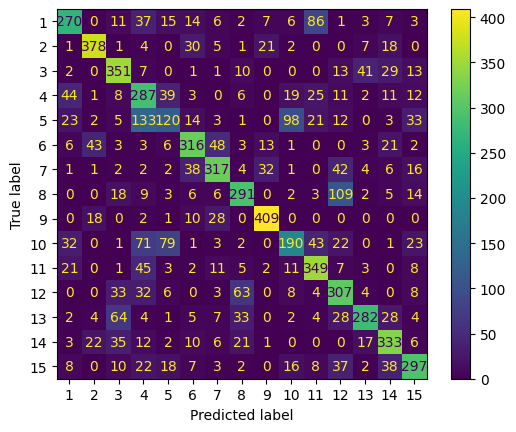

                  precision    recall  f1-score   support

           beach       0.65      0.58      0.61       468
             bus       0.81      0.81      0.81       468
 cafe_restaurant       0.66      0.62      0.64       468
             car       0.84      0.87      0.86       468
     city_center       0.53      0.41      0.46       468
     forest_path       0.64      0.75      0.69       468
   grocery_store       0.52      0.66      0.58       468
            home       0.76      0.60      0.67       468
         library       0.67      0.71      0.69       468
   metro_station       0.68      0.63      0.65       468
          office       0.65      0.75      0.69       468
            park       0.43      0.61      0.50       468
residential_area       0.41      0.26      0.31       468
           train       0.69      0.68      0.68       468
            tram       0.71      0.68      0.69       468

        accuracy                           0.64      7020
       macro

In [16]:
svm_preds_classes = []
y_preds_classes = []

for i in range(len(svm_preds)):
    svm_preds_classes.append(classes[int(svm_preds[i])])
    y_preds_classes.append(classes[int(y_preds[i])])

matriz_confusao = confusion_matrix(y_preds, svm_preds)
relatorio_classificacao = classification_report(y_preds_classes, svm_preds_classes)

acc = accuracy_score(y_preds, svm_preds)
print(acc)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=[i for i in range(1, 16)])

cm_display.plot()

plt.show()

print(relatorio_classificacao)

In [17]:
y_preds = []
knn_preds = []
best_model_knn, best_acc_knn = None, 0.0

k_fold = 5
# Split dos folds
kfold = KFold(n_splits=k_fold, shuffle=True)

# For para treinamento entre os folds
fold_no = 1
for train, test in kfold.split(X, y):
    print('------------------------------------------------------------------------')
    print(f'Treinamento para o fold {fold_no} ...')

    # Vetores para teste e treinamento
    x_train_knn = []
    y_train_knn = []

    x_test_knn = []
    y_test_knn = []

    # Fazendo o split dos dados para treinamento
    for i in train:
        for j in range(6):
            x_train_knn.append(X[i][j])
            y_train_knn.append(y[i])
    
    # Fazendo o split dos dados para teste
    for i in test:
        for j in range(6):
            x_test_knn.append(X[i][j])
            y_test_knn.append(y[i])

    y_pred = y_test_knn[:]
    for res in y_pred:
        y_preds.append(res)

    # kNN com os melhores parâmetros encontrados
    knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')
    knn_model.fit(x_train_knn, y_train_knn)
    knn_predictions = knn_model.predict(x_test_knn)

    acc_knn = accuracy_score(y_test_knn, knn_predictions)

    for i in knn_predictions:
        knn_preds.append(i)

    print(f'{acc_knn} para o fold {fold_no}')

    if acc_knn > best_acc_knn:
        best_acc_knn = acc_knn
        best_model_knn = knn_model

    fold_no += 1

------------------------------------------------------------------------
Treinamento para o fold 1 ...
0.6794871794871795 para o fold 1
------------------------------------------------------------------------
Treinamento para o fold 2 ...
0.6816239316239316 para o fold 2
------------------------------------------------------------------------
Treinamento para o fold 3 ...
0.6745014245014245 para o fold 3
------------------------------------------------------------------------
Treinamento para o fold 4 ...
0.6153846153846154 para o fold 4
------------------------------------------------------------------------
Treinamento para o fold 5 ...
0.6823361823361823 para o fold 5


In [18]:
knn_preds_classes = []
y_preds_classes = []

for i in range(len(knn_preds)):
    knn_preds_classes.append(classes[int(knn_preds[i])])
    y_preds_classes.append(classes[int(y_preds[i])])

matriz_confusao = confusion_matrix(y_preds, knn_preds)
relatorio_classificacao = classification_report(y_preds_classes, knn_preds_classes)

acc = accuracy_score(y_preds, knn_preds)
print(acc)

0.6666666666666666


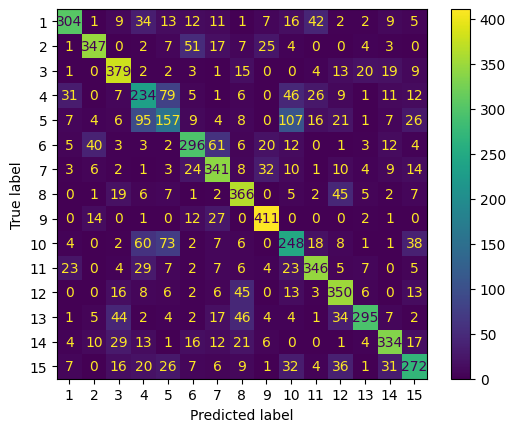

                  precision    recall  f1-score   support

           beach       0.78      0.65      0.71       468
             bus       0.81      0.74      0.77       468
 cafe_restaurant       0.67      0.78      0.72       468
             car       0.81      0.88      0.84       468
     city_center       0.48      0.53      0.50       468
     forest_path       0.75      0.74      0.74       468
   grocery_store       0.65      0.75      0.70       468
            home       0.83      0.63      0.72       468
         library       0.75      0.71      0.73       468
   metro_station       0.64      0.58      0.61       468
          office       0.71      0.81      0.75       468
            park       0.46      0.50      0.48       468
residential_area       0.41      0.34      0.37       468
           train       0.67      0.63      0.65       468
            tram       0.66      0.73      0.69       468

        accuracy                           0.67      7020
       macro

In [19]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=[i for i in range(1, 16)])

cm_display.plot()

plt.show()

print(relatorio_classificacao)